In [217]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from matplotlib import pyplot as plt
import seaborn as sns
import math

Принадлежность выборки равномерному распределению

По критерию Колмогорова

In [218]:
def kol_is_uniform(xs):

    pval = ss.kstest(xs, 'uniform')[1] #Получение значения p-value при проверке гипотезы о принадлежности данного распределения равномерному

    if pval < 0.05: #Утверждать принадлежность равномерному распределению c уровнем значимости 5%
        return False, pval

    return True, pval
    

По критерию хи-квадрата Пирсона

In [219]:
def pir_is_uniform(xs):
    
    freq = np.histogram(xs, 'sturges', (0, 1))[0] #Вычисление количества вхождений в интервалы по Стёрджесу
    pval = ss.chisquare(freq)[1] #Получение значения p-value с использованием полученных вхождений
    
    if pval < 0.05: #Утверждать принадлежность равномерному распределению c уровнем значимости 5%
        return False, pval

    return True, pval

Рассчёт p-value по критерию Колмогорова

In [220]:
def get_kolm_pval(xs):

    st = sorted(set(xs))

    fun = [xs.count(i) for i in st]  #Подсчет количества вхождений каждого элемента
    fun = np.cumsum(fun)   #Количество вхождений элементов для каждого интервала
    fun = [i / fun[-1] for i in fun] #Составление эмпирической функции распределения
    fun.insert(0, 0)
    st.insert(0, 0)
    
    ln = len(st)
    st.append(1)

    Dp = max([abs(fun[i] - st[i + 1])  for i in range(ln)]) #Нахождение супремума разностей эмпирической и теоретической функций
    Dm = max([abs(fun[i] - st[i]) for i in range(ln)])
    
    y = max(Dp, Dm) * math.sqrt(len(xs))

    pval = 0
    for i in range(-100000, 1000000): #Нахождение pval для найденного y
        pval += (-1) ** i * math.exp(-2 * (i ** 2) * y ** 2)

    return 1 - pval

Рассчёт p-value по критерию хи-квадрат

In [221]:
def get_pir_pval(xs):

    f_obs = np.histogram(xs, 'sturges', (0, 1))[0] #Вычисление количества вхождений в интервалы по Стёрджесу
    ln = len(f_obs)
    sm = sum(f_obs)
    
    f_exp = np.array([sm / ln for i in range(ln)]) #Равномерное распределение, которое ожидается получить из данной выборки 

    stat = ((f_obs - f_exp) ** 2 / f_exp).sum() #Вычисление меры близости
    pval = 1 - ss.chi2.cdf(stat, ln - 1)  #Вычисление p-value через функцию распределения хи-квадрат

    return pval

Main

Распределение по критерию Колмогорова не относится к равномерному
Распределение по критерию хи-квадрат Пирсона не относится к равномерному 

Значение p-value по критерию Колмогорова(scipy): 0.0003037176175121105
Значение p-value по критерию Колмогорова(вручную): 0.0003725187596219648 

Значение p-value по критерию хи-квадрат(scipy): 4.348561152705685e-05
Значение p-value по критерию хи-квадрат(вручную): 4.3485611527005474e-05 

Критическое значение для хи-квадрат при критерии 0.1: 13.36156613651173
Критическое значение для хи-квадрат при критерии 0.01: 20.090235029663233
Критическое значение для хи-квадрат при критерии 0.001: 26.12448155837614


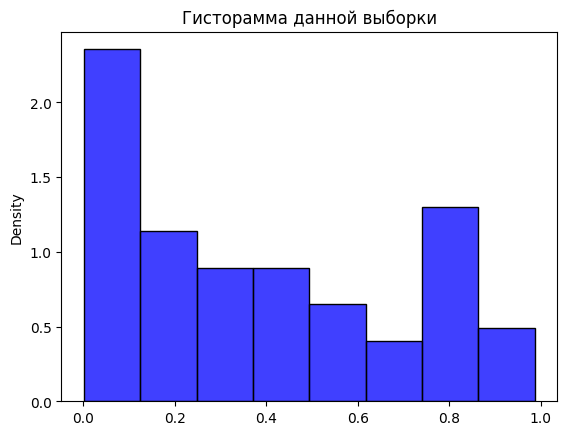

In [222]:
xs = pd.read_csv('./Лейсле_Александр_Геннадьевич.csv')
xs = sorted(list(xs.data))

sns.histplot(x = xs, stat = 'density', bins = 'sturges', color = 'blue')
plt.title('Гисторамма данной выборки')

is_unif_kol, pvalKol = kol_is_uniform(xs)
is_unif_pir, pvalPir = pir_is_uniform(xs)

print('Распределение по критерию Колмогорова', end = ' ')
if not is_unif_kol:
     print('не', end = ' ')
print('относится к равномерному')

print('Распределение по критерию хи-квадрат Пирсона', end = ' ')
if not is_unif_pir:
     print('не', end = ' ')
print('относится к равномерному', '\n')

print('Значение p-value по критерию Колмогорова(scipy):', pvalKol)
print('Значение p-value по критерию Колмогорова(вручную):', get_kolm_pval(xs), '\n')

print('Значение p-value по критерию хи-квадрат(scipy):', pvalPir)
print('Значение p-value по критерию хи-квадрат(вручную):', get_pir_pval(xs), '\n')

ln = len(np.histogram(xs, 'sturges', (0, 1))[0])
print('Критическое значение для хи-квадрат при критерии 0.1:', ss.chi2.ppf(1 - 0.1, df = ln))
print('Критическое значение для хи-квадрат при критерии 0.01:', ss.chi2.ppf(1 - 0.01, df = ln))
print('Критическое значение для хи-квадрат при критерии 0.001:', ss.chi2.ppf(1 - 0.001, df = ln))
